In [218]:
from data_generator import dgen,pack_by_value,downscale_nsave,Levenh_source,data_generator,dir_source,resize_tuple
from dict2obj import Dict2Obj
from fit_pca import plot_images_table,get_pca_sk_transformer

import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

import os, time, shutil

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [310]:
path = "img/Levenh"
now = time.time()
experiment = Dict2Obj({
    "start_time":now,  #time.mktime((2018,9,24,19,39,4,0,0,0)),
    "tick":10,
    "transition_dur":4,
})

#downscale_nsave(path,'small',factor=0.2)

In [311]:
#source = Levenh_source(path)
def pipeline(path,experiment):
    source  = Levenh_source(path)
    data_gen = data_generator(source,experiment)
    resized = resize_tuple(data_gen)
    return resized


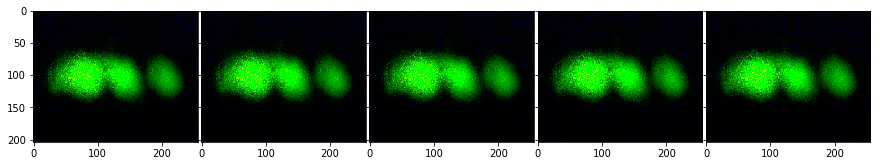

In [312]:
imgs = [d[0] for d in data]

plot_images_table(imgs[:5],columns=5,figsize=(15,35))

In [342]:
n_components = 20
#train_gen = pipeline(path,experiment)
#train_data = []
#for t in train_gen:
    #train_data.append(t)
 #   print(t[1])

pca_gen, transformed = get_pca_sk_transformer((d[0][:,:,1] for d in train_data),n_components=n_components)

X_train, y_train = np.array(transformed)/256, np.array([d[1] for d in train_data])
y_train -= np.mean(y_train)
y_train /= np.std(y_train)
y_train-=np.min(y_train)
packed = pack_by_value(train_data)
pack_sizes = [len(p[1]) for p in packed]
np.random.seed(42)
validate = np.array([np.random.randint(0,s) for s in pack_sizes])
cum = np.cumsum([0]+pack_sizes)

validate = validate+cum[:-1]
print('validating on this indices:',validate)
train = np.delete(range(len(X_train)),validate)
print("X,y shape:",X_train.shape,y_train.shape)
print(y_train)

Packed to 20 buckets, lengths: [4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
validating on this indices: [ 2  7 13 16 23 28 30 36 41 46 53 57 61 68 70 77 80 87 93 94]
X,y shape: (100, 20) (100, 1)
[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.17342199]
 [0.17342199]
 [0.17342199]
 [0.17342199]
 [0.17342199]
 [0.34684399]
 [0.34684399]
 [0.34684399]
 [0.34684399]
 [0.34684399]
 [0.52026598]
 [0.52026598]
 [0.52026598]
 [0.52026598]
 [0.52026598]
 [0.69368798]
 [0.69368798]
 [0.69368798]
 [0.69368798]
 [0.69368798]
 [0.86710997]
 [0.86710997]
 [0.86710997]
 [0.86710997]
 [0.86710997]
 [1.04053196]
 [1.04053196]
 [1.04053196]
 [1.04053196]
 [1.04053196]
 [1.21395396]
 [1.21395396]
 [1.21395396]
 [1.21395396]
 [1.21395396]
 [1.38737595]
 [1.38737595]
 [1.38737595]
 [1.38737595]
 [1.38737595]
 [1.56079795]
 [1.56079795]
 [1.56079795]
 [1.56079795]
 [1.56079795]
 [1.73421994]
 [1.73421994]
 [1.73421994]
 [1.73421994]
 [1.73421994]
 [1.90764193]
 [1.

In [343]:
# reset the data!
shutil.rmtree(path)
os.makedirs(path)

In [344]:
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Input, Flatten, BatchNormalization
from keras.models import Model
from keras.optimizers import Adam

In [345]:
#layers
first = 20
second = 10
out = 1

In [348]:
inp_shape = X_train.shape[1:]
print("Xtrain shape",inp_shape)
inp = Input(shape = inp_shape)
x = Dense(first, activation='relu')(inp)
x = Dense(second, activation='relu')(x)
x = Dense(out, activation='relu')(x)
model = Model(inp, x)
opt = Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0001, amsgrad=False)

model.compile(loss='mse',optimizer=opt)

Xtrain shape (20,)


In [349]:
model.fit(X_train[train], y_train[train],
          batch_size=20, 
          epochs=500,
          shuffle=True,
          validation_data=(X_train[validate], y_train[validate]))

Train on 80 samples, validate on 20 samples
Epoch 1/500
80/80 [==============================] - ETA: 2s - loss: 40.05 - 1s 12ms/step - loss: 48.0489 - val_loss: 38.9161
Epoch 2/500
80/80 [==============================] - ETA: 0s - loss: 55.64 - 0s 213us/step - loss: 29.4795 - val_loss: 24.2974
Epoch 3/500
80/80 [==============================] - ETA: 0s - loss: 10.87 - 0s 326us/step - loss: 15.7581 - val_loss: 15.1584
Epoch 4/500
80/80 [==============================] - ETA: 0s - loss: 8.505 - 0s 301us/step - loss: 9.1122 - val_loss: 9.2635
Epoch 5/500
80/80 [==============================] - ETA: 0s - loss: 9.580 - 0s 238us/step - loss: 5.7184 - val_loss: 5.7312
Epoch 6/500
80/80 [==============================] - ETA: 0s - loss: 4.005 - 0s 251us/step - loss: 3.4575 - val_loss: 3.9108
Epoch 7/500
80/80 [==============================] - ETA: 0s - loss: 2.058 - 0s 213us/step - loss: 2.4984 - val_loss: 3.1959
Epoch 8/500
80/80 [==============================] - ETA: 0s - loss: 2.162 -

Epoch 66/500
80/80 [==============================] - ETA: 0s - loss: 1.486 - 0s 213us/step - loss: 0.9917 - val_loss: 0.8617
Epoch 67/500
80/80 [==============================] - ETA: 0s - loss: 1.489 - 0s 188us/step - loss: 0.9891 - val_loss: 0.8515
Epoch 68/500
80/80 [==============================] - ETA: 0s - loss: 0.924 - 0s 188us/step - loss: 0.9871 - val_loss: 0.8525
Epoch 69/500
80/80 [==============================] - ETA: 0s - loss: 0.476 - 0s 251us/step - loss: 0.9864 - val_loss: 0.8405
Epoch 70/500
80/80 [==============================] - ETA: 0s - loss: 0.923 - 0s 226us/step - loss: 0.9850 - val_loss: 0.8354
Epoch 71/500
80/80 [==============================] - ETA: 0s - loss: 2.409 - 0s 251us/step - loss: 0.9835 - val_loss: 0.8273
Epoch 72/500
80/80 [==============================] - ETA: 0s - loss: 0.163 - 0s 213us/step - loss: 0.9818 - val_loss: 0.8141
Epoch 73/500
80/80 [==============================] - ETA: 0s - loss: 0.718 - 0s 276us/step - loss: 0.9790 - val_loss:

Epoch 131/500
80/80 [==============================] - ETA: 0s - loss: 1.671 - 0s 163us/step - loss: 0.9194 - val_loss: 0.6396
Epoch 132/500
80/80 [==============================] - ETA: 0s - loss: 1.048 - 0s 288us/step - loss: 0.9195 - val_loss: 0.6459
Epoch 133/500
80/80 [==============================] - ETA: 0s - loss: 0.299 - 0s 188us/step - loss: 0.9182 - val_loss: 0.6479
Epoch 134/500
80/80 [==============================] - ETA: 0s - loss: 0.492 - 0s 188us/step - loss: 0.9176 - val_loss: 0.6287
Epoch 135/500
80/80 [==============================] - ETA: 0s - loss: 1.690 - 0s 276us/step - loss: 0.9164 - val_loss: 0.6200
Epoch 136/500
80/80 [==============================] - ETA: 0s - loss: 0.304 - 0s 188us/step - loss: 0.9156 - val_loss: 0.6241
Epoch 137/500
80/80 [==============================] - ETA: 0s - loss: 1.194 - 0s 188us/step - loss: 0.9144 - val_loss: 0.6304
Epoch 138/500
80/80 [==============================] - ETA: 0s - loss: 0.584 - 0s 213us/step - loss: 0.9143 - v

80/80 [==============================] - ETA: 0s - loss: 0.809 - 0s 226us/step - loss: 0.8842 - val_loss: 0.5870
Epoch 196/500
80/80 [==============================] - ETA: 0s - loss: 0.795 - 0s 163us/step - loss: 0.8839 - val_loss: 0.5801
Epoch 197/500
80/80 [==============================] - ETA: 0s - loss: 1.322 - 0s 251us/step - loss: 0.8836 - val_loss: 0.5758
Epoch 198/500
80/80 [==============================] - ETA: 0s - loss: 1.133 - 0s 200us/step - loss: 0.8835 - val_loss: 0.5756
Epoch 199/500
80/80 [==============================] - ETA: 0s - loss: 0.236 - 0s 238us/step - loss: 0.8829 - val_loss: 0.5885
Epoch 200/500
80/80 [==============================] - ETA: 0s - loss: 0.808 - 0s 200us/step - loss: 0.8828 - val_loss: 0.5881
Epoch 201/500
80/80 [==============================] - ETA: 0s - loss: 1.002 - 0s 351us/step - loss: 0.8823 - val_loss: 0.5769
Epoch 202/500
80/80 [==============================] - ETA: 0s - loss: 0.489 - 0s 201us/step - loss: 0.8821 - val_loss: 0.571

Epoch 260/500
80/80 [==============================] - ETA: 0s - loss: 1.856 - 0s 301us/step - loss: 0.8700 - val_loss: 0.5539
Epoch 261/500
80/80 [==============================] - ETA: 0s - loss: 1.002 - 0s 401us/step - loss: 0.8698 - val_loss: 0.5467
Epoch 262/500
80/80 [==============================] - ETA: 0s - loss: 0.566 - 0s 351us/step - loss: 0.8697 - val_loss: 0.5469
Epoch 263/500
80/80 [==============================] - ETA: 0s - loss: 0.247 - 0s 275us/step - loss: 0.8695 - val_loss: 0.5501
Epoch 264/500
80/80 [==============================] - ETA: 0s - loss: 0.247 - 0s 238us/step - loss: 0.8693 - val_loss: 0.5483
Epoch 265/500
80/80 [==============================] - ETA: 0s - loss: 1.094 - 0s 288us/step - loss: 0.8690 - val_loss: 0.5460
Epoch 266/500
80/80 [==============================] - ETA: 0s - loss: 1.854 - 0s 238us/step - loss: 0.8688 - val_loss: 0.5470
Epoch 267/500
80/80 [==============================] - ETA: 0s - loss: 0.020 - 0s 301us/step - loss: 0.8687 - v

80/80 [==============================] - ETA: 0s - loss: 0.017 - 0s 226us/step - loss: 0.8613 - val_loss: 0.5117
Epoch 325/500
80/80 [==============================] - ETA: 0s - loss: 0.775 - 0s 251us/step - loss: 0.8612 - val_loss: 0.5125
Epoch 326/500
80/80 [==============================] - ETA: 0s - loss: 0.774 - 0s 188us/step - loss: 0.8610 - val_loss: 0.5133
Epoch 327/500
80/80 [==============================] - ETA: 0s - loss: 0.248 - 0s 226us/step - loss: 0.8609 - val_loss: 0.5098
Epoch 328/500
80/80 [==============================] - ETA: 0s - loss: 1.548 - 0s 213us/step - loss: 0.8608 - val_loss: 0.5082
Epoch 329/500
80/80 [==============================] - ETA: 0s - loss: 1.109 - 0s 238us/step - loss: 0.8607 - val_loss: 0.5115
Epoch 330/500
80/80 [==============================] - ETA: 0s - loss: 0.576 - 0s 238us/step - loss: 0.8607 - val_loss: 0.5125
Epoch 331/500
80/80 [==============================] - ETA: 0s - loss: 1.106 - 0s 188us/step - loss: 0.8604 - val_loss: 0.510

Epoch 389/500
80/80 [==============================] - ETA: 0s - loss: 0.560 - 0s 301us/step - loss: 0.8562 - val_loss: 0.4770
Epoch 390/500
80/80 [==============================] - ETA: 0s - loss: 0.461 - 0s 251us/step - loss: 0.8558 - val_loss: 0.4784
Epoch 391/500
80/80 [==============================] - ETA: 0s - loss: 1.110 - 0s 213us/step - loss: 0.8561 - val_loss: 0.4831
Epoch 392/500
80/80 [==============================] - ETA: 0s - loss: 1.640 - 0s 238us/step - loss: 0.8559 - val_loss: 0.4830
Epoch 393/500
80/80 [==============================] - ETA: 0s - loss: 0.555 - 0s 251us/step - loss: 0.8556 - val_loss: 0.4788
Epoch 394/500
80/80 [==============================] - ETA: 0s - loss: 0.769 - 0s 288us/step - loss: 0.8556 - val_loss: 0.4756
Epoch 395/500
80/80 [==============================] - ETA: 0s - loss: 0.978 - 0s 251us/step - loss: 0.8556 - val_loss: 0.4759
Epoch 396/500
80/80 [==============================] - ETA: 0s - loss: 1.640 - 0s 251us/step - loss: 0.8555 - v

80/80 [==============================] - ETA: 0s - loss: 1.647 - 0s 338us/step - loss: 0.8533 - val_loss: 0.4615
Epoch 454/500
80/80 [==============================] - ETA: 0s - loss: 0.774 - 0s 188us/step - loss: 0.8532 - val_loss: 0.4613
Epoch 455/500
80/80 [==============================] - ETA: 0s - loss: 0.236 - 0s 238us/step - loss: 0.8531 - val_loss: 0.4609
Epoch 456/500
80/80 [==============================] - ETA: 0s - loss: 0.770 - 0s 226us/step - loss: 0.8530 - val_loss: 0.4626
Epoch 457/500
80/80 [==============================] - ETA: 0s - loss: 1.311 - 0s 251us/step - loss: 0.8531 - val_loss: 0.4623
Epoch 458/500
80/80 [==============================] - ETA: 0s - loss: 0.008 - 0s 251us/step - loss: 0.8530 - val_loss: 0.4606
Epoch 459/500
80/80 [==============================] - ETA: 0s - loss: 0.013 - 0s 201us/step - loss: 0.8531 - val_loss: 0.4592
Epoch 460/500
80/80 [==============================] - ETA: 0s - loss: 0.009 - 0s 301us/step - loss: 0.8530 - val_loss: 0.459

In [351]:
path_test = "img/Levenh"
now = time.time()
experiment = Dict2Obj({
    "start_time":now,  #time.mktime((2018,9,24,19,39,4,0,0,0)),
    "tick":10,
    "transition_dur":1,
})
source  = Levenh_source(path_test)
data_gen = data_generator(source,experiment_test)
resized = resize_tuple(data_gen)
pca_ed = pca_gen( (d[0][:,:,1] for d in resized) )
#predictor = model.predict_generator(pca_ed)
for x in pca_ed:
    x = np.array(x)/256
    pred = model.predict(x)
    print('predicted:',pred)


Watching img/Levenh for new files...
found first image, running ok...
predicted: [[0.]]
predicted: [[0.]]
ERROR: file Thumbs.db IOerrr
predicted: [[0.]]
predicted: [[0.]]
predicted: [[0.]]
predicted: [[0.]]
predicted: [[0.]]
predicted: [[0.]]
predicted: [[0.]]
predicted: [[0.]]
predicted: [[0.]]
predicted: [[0.]]
predicted: [[0.]]
predicted: [[0.]]
predicted: [[0.]]
predicted: [[0.]]
predicted: [[0.]]
predicted: [[1.8891994]]
predicted: [[2.6175225]]
predicted: [[2.4794564]]
predicted: [[2.2040336]]
predicted: [[2.66543]]
predicted: [[3.0618687]]
predicted: [[2.7178657]]
predicted: [[2.2473733]]
predicted: [[2.5896914]]
predicted: [[3.187097]]
predicted: [[2.429878]]
predicted: [[2.8812969]]
predicted: [[3.2665303]]
predicted: [[2.7444336]]
predicted: [[2.33168]]
predicted: [[2.3199747]]
predicted: [[2.295746]]
predicted: [[3.1433299]]
predicted: [[2.9073863]]
predicted: [[0.26240554]]
predicted: [[0.28303102]]
predicted: [[0.5148959]]
predicted: [[0.]]
predicted: [[0.]]
predicted: [[0

In [ ]:
from sklearn.externals import joblib # saving pca
_ = joblib.dump(pca, 'PCA'+str(n_components)+'.save')

In [ ]:
pca = joblib.load('PCA'+str(n_components)+'.save')

In [18]:
transformed = pca.transform(X)

In [30]:
transformed = transformed/transformed.max()


In [39]:
angles = np.array([d[1] for d in data])
angles = angels - angels.min()
angles

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  9.,
        9.,  9.,  9.,  9.,  9., 10., 10., 10., 10., 10., 10., 10., 11.,
       11., 11., 11., 11., 11., 11., 12., 12., 12., 12., 12., 12., 12.,
       13., 13., 13., 13., 13., 13., 13.])

In [43]:
enc = OneHotEncoder()
enc.fit(angles.reshape(len(angles),1))
trAng = enc.transform(angles.reshape(len(angles),1))

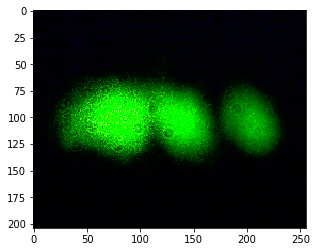

In [55]:
#X = [np.array(d.getdata()).flatten() for d in imgs]
X = np.array(X).reshape(len(X), 204, 256, 3)

import matplotlib.pyplot as plt
plt.imshow((X[0]).astype(np.uint8), interpolation='nearest')

In [50]:
test = np.cumsum([0, 6, 7, 7, 7, 8, 7, 8, 7, 7, 6, 7, 7, 7])
train = np.delete(range(len(X)), test)

NameError: name 'X' is not defined

In [209]:
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Input, Flatten, BatchNormalization
from keras.models import Model

In [217]:
#layers
first = 20
second = 10
out = 1

In [253]:
inp = Input(shape = (204, 256, 3))
x = MaxPooling2D((2, 2), padding='same')(inp)
x = Conv2D(1, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((20, 20), padding='same')(x)
x = Conv2D(1, (2, 2), activation='relu', padding='same')(x)
#x = MaxPooling2D((10, 10), padding='same')(x)
x = Flatten()(x)
x = Dense(first, activation='relu')(x)
x = Dense(second, activation='relu')(x)
x = Dense(out, activation='relu')(x)
model = Model(inp, x)
model.compile(loss='mae', optimizer='adam')

In [254]:
model.fit(X[train]/256, angles[train]%10/10, batch_size=4, epochs=300, shuffle=True, validation_data=(X[test]/256, angles[test]%10/10))

Train on 84 samples, validate on 14 samples
Epoch 1/300
84/84 [==============================] - ETA: 1:00 - loss: 0.350 - ETA: 13s - loss: 0.425 - ETA: 6s - loss: 0.3679 - ETA: 3s - loss: 0.380 - ETA: 1s - loss: 0.369 - ETA: 0s - loss: 0.359 - 4s 42ms/step - loss: 0.3655 - val_loss: 0.3643
Epoch 2/300
84/84 [==============================] - ETA: 0s - loss: 0.575 - ETA: 0s - loss: 0.375 - ETA: 0s - loss: 0.346 - ETA: 0s - loss: 0.334 - ETA: 0s - loss: 0.355 - ETA: 0s - loss: 0.358 - 0s 5ms/step - loss: 0.3655 - val_loss: 0.3643
Epoch 3/300
84/84 [==============================] - ETA: 0s - loss: 0.325 - ETA: 0s - loss: 0.310 - ETA: 0s - loss: 0.319 - ETA: 0s - loss: 0.351 - ETA: 0s - loss: 0.364 - 0s 4ms/step - loss: 0.3655 - val_loss: 0.3643
Epoch 4/300
84/84 [==============================] - ETA: 0s - loss: 0.325 - ETA: 0s - loss: 0.330 - ETA: 0s - loss: 0.359 - ETA: 0s - loss: 0.354 - ETA: 0s - loss: 0.331 - ETA: 0s - loss: 0.348 - 0s 5ms/step - loss: 0.3655 - val_loss: 0.3643
Epo

84/84 [==============================] - ETA: 0s - loss: 0.040 - ETA: 0s - loss: 0.037 - ETA: 0s - loss: 0.038 - ETA: 0s - loss: 0.036 - ETA: 0s - loss: 0.039 - ETA: 0s - loss: 0.040 - ETA: 0s - loss: 0.040 - 0s 5ms/step - loss: 0.0430 - val_loss: 0.0564
Epoch 64/300
84/84 [==============================] - ETA: 0s - loss: 0.015 - ETA: 0s - loss: 0.026 - ETA: 0s - loss: 0.051 - ETA: 0s - loss: 0.041 - ETA: 0s - loss: 0.040 - ETA: 0s - loss: 0.039 - ETA: 0s - loss: 0.039 - 0s 5ms/step - loss: 0.0410 - val_loss: 0.0584
Epoch 65/300
84/84 [==============================] - ETA: 0s - loss: 0.103 - ETA: 0s - loss: 0.043 - ETA: 0s - loss: 0.049 - ETA: 0s - loss: 0.049 - ETA: 0s - loss: 0.049 - ETA: 0s - loss: 0.047 - 0s 5ms/step - loss: 0.0471 - val_loss: 0.0582
Epoch 66/300
84/84 [==============================] - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.035 - ETA: 0s - loss: 0.030 - ETA: 0s - loss: 0.046 - ETA: 0s - loss: 0.044 - ETA: 0s - loss: 0.044 - ETA: 0s - loss: 0.041 - 0s 5ms/step

Epoch 125/300
84/84 [==============================] - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.018 - ETA: 0s - loss: 0.017 - ETA: 0s - loss: 0.016 - ETA: 0s - loss: 0.023 - ETA: 0s - loss: 0.024 - ETA: 0s - loss: 0.024 - 0s 5ms/step - loss: 0.0251 - val_loss: 0.0431
Epoch 126/300
84/84 [==============================] - ETA: 0s - loss: 0.032 - ETA: 0s - loss: 0.036 - ETA: 0s - loss: 0.026 - ETA: 0s - loss: 0.025 - ETA: 0s - loss: 0.023 - ETA: 0s - loss: 0.023 - ETA: 0s - loss: 0.025 - 0s 6ms/step - loss: 0.0269 - val_loss: 0.0392
Epoch 127/300
84/84 [==============================] - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.022 - ETA: 0s - loss: 0.025 - ETA: 0s - loss: 0.022 - ETA: 0s - loss: 0.022 - ETA: 0s - loss: 0.026 - ETA: 0s - loss: 0.027 - 0s 5ms/step - loss: 0.0268 - val_loss: 0.0432
Epoch 128/300
84/84 [==============================] - ETA: 0s - loss: 0.019 - ETA: 0s - loss: 0.042 - ETA: 0s - loss: 0.036 - ETA: 0s - loss: 0.034 - ETA: 0s - loss: 0.032 - ETA: 0s - loss: 0.

84/84 [==============================] - ETA: 0s - loss: 0.017 - ETA: 0s - loss: 0.019 - ETA: 0s - loss: 0.024 - ETA: 0s - loss: 0.024 - ETA: 0s - loss: 0.022 - ETA: 0s - loss: 0.020 - ETA: 0s - loss: 0.021 - 0s 5ms/step - loss: 0.0224 - val_loss: 0.0401
Epoch 186/300
84/84 [==============================] - ETA: 0s - loss: 0.026 - ETA: 0s - loss: 0.018 - ETA: 0s - loss: 0.023 - ETA: 0s - loss: 0.019 - ETA: 0s - loss: 0.019 - ETA: 0s - loss: 0.019 - ETA: 0s - loss: 0.020 - 0s 5ms/step - loss: 0.0209 - val_loss: 0.0341
Epoch 187/300
84/84 [==============================] - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.022 - ETA: 0s - loss: 0.025 - ETA: 0s - loss: 0.024 - ETA: 0s - loss: 0.024 - ETA: 0s - loss: 0.021 - ETA: 0s - loss: 0.022 - 0s 5ms/step - loss: 0.0220 - val_loss: 0.0309
Epoch 188/300
84/84 [==============================] - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.022 - ETA: 0s - loss: 0.022 - ETA: 0s - loss: 0.024 - ETA: 0s - loss: 0.022 - ETA: 0s - loss: 0.020 - ETA: 0s 

84/84 [==============================] - ETA: 0s - loss: 0.016 - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.013 - ETA: 0s - loss: 0.015 - ETA: 0s - loss: 0.015 - 0s 5ms/step - loss: 0.0182 - val_loss: 0.0346
Epoch 246/300
84/84 [==============================] - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.024 - ETA: 0s - loss: 0.021 - ETA: 0s - loss: 0.021 - ETA: 0s - loss: 0.018 - ETA: 0s - loss: 0.017 - ETA: 0s - loss: 0.017 - 0s 5ms/step - loss: 0.0172 - val_loss: 0.0346
Epoch 247/300
84/84 [==============================] - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.016 - ETA: 0s - loss: 0.018 - ETA: 0s - loss: 0.023 - ETA: 0s - loss: 0.026 - ETA: 0s - loss: 0.022 - ETA: 0s - loss: 0.022 - 0s 5ms/step - loss: 0.0225 - val_loss: 0.0418
Epoch 248/300
84/84 [==============================] - ETA: 0s - loss: 0.021 - ETA: 0s - loss: 0.015 - ETA: 0s - loss: 0.017 - ETA: 0s - loss: 0.020 - ETA: 0s - loss: 0.020 - ETA: 0s - loss: 0.020 - ETA: 0s 

In [255]:
pred = model.predict(X[test]/256)*10

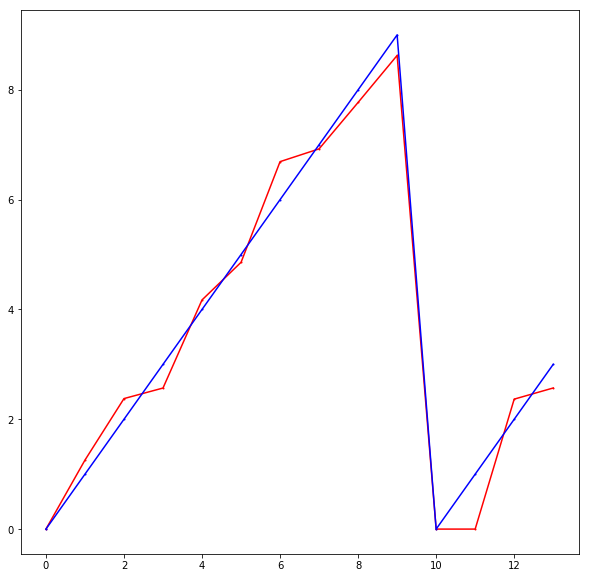

In [256]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10, 10))
plot=fig.add_subplot(111)
plot.plot(range(len(pred)), pred[:, 0], 'ro-', ms=1)
plot.plot(range(len(pred)), angles[test]%10, 'bo-', ms=1)

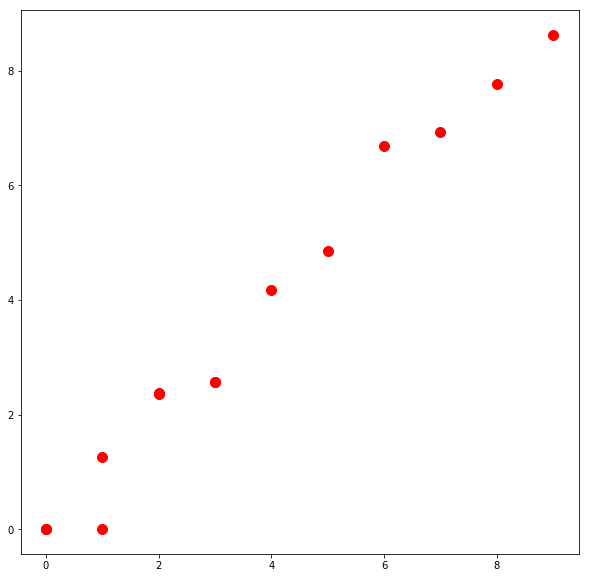

In [258]:
fig=plt.figure(figsize=(10, 10))
plot=fig.add_subplot(111)
plot.plot(angles[test]%10, pred[:, 0], 'ro', ms=10)